# Dynamic Dollar-Cost Averaging for Bitcoin: A Cycle-Aware Accumulation Strategy
### GT-MSA-S25-Trilemma-Team-14
*Georgia Tech Summer 2025 MSA Practicum Project*  
*Model Development*

----

### 1. Executive Summary

This project successfully developed a Dynamic Dollar-Cost Averaging (DCA) strategy for Bitcoin that intelligently adapts its purchasing behavior to market conditions. The model operates on a two-layer system: first, a 'strategic' layer assesses the long-term market cycle to set a broad, year-long investment plan. Second, a 'tactical' layer makes daily adjustments to this plan, automatically increasing its buy allocation during market dips and reducing it during rallies to systematically take advantage of volatility.

The strategy was guided by a key exploratory finding: **Bitcoin's own price history is the most powerful and reliable signal** for understanding its market cycles. A statistical analysis of price momentum across different time frames revealed clear, recurring patterns corresponding to major market phases. This insight allowed for the development of a highly effective model focused solely on this robust signal, without the need for complex external metrics.

The final model is exceptionally effective, achieving a **final score of 94.49**. This score is a balanced blend of the model's average timing skill (its percentile performance compared to the best and worst possible outcomes within a year) and its consistency (the rate at which it beats a simple, static investment strategy). This high score is driven by the model's remarkable ability to outperform a standard, uniform DCA approach in **99.4%** of all rolling one-year periods tested since 2011.

#### **Strengths**

The model exhibits several key strengths that contribute to its robust performance:

* **Exceptional Consistency:** Its ability to win against a standard DCA strategy in virtually all market conditions since 2011 underscores its reliability.
* **Multi-Scale Cyclical Awareness:** By analyzing momentum across five time frames (from 30 days to 4 years), the model maintains a constant awareness of the long-term cycle, preventing it from being misled by short-term market noise.
* **High Interpretability:** Unlike "black box" models, its logic is fully interpretable. Its learned parameters can be examined to understand exactly *why* it makes certain decisions, which builds confidence and allows for clear diagnostics.
* **Automated and Disciplined:** The strategy is entirely data-driven, removing emotion, bias, and the need for manual intervention from investment decisions.
* **No Reliance on External Data:** The model's success relies solely on price. This makes it highly resilient and future-proof, as it doesn't depend on third-party data feeds that could change or become unavailable.

#### **Limitations**

To provide a balanced view, it is crucial to understand the model's operational boundaries and limitations:

* **Historical Dependence:** Its logic is derived from past price patterns. Its effectiveness assumes that similar fundamental market structures will continue into the future and could be impacted by an unprecedented "black swan" event.
* **Fixed Investment Horizon:** The strategy is specifically optimized for a 365-day investment window and does not provide guidance for investors with indefinite or alternative time horizons.
* **Assumes Lump-Sum Capital Deployment:** The model is designed around deploying a pre-defined amount of capital over one year. It is not built for an investor who makes regular new contributions from an external source (e.g., investing from a monthly salary).
* **Static Annual Baseline:** The overarching annual investment curve is set on Day 1. A potential enhancement would be to have the model periodically re-evaluate and redistribute remaining capital based on current market conditions, a feature omitted due to the exponential increase in computational power required for training.
* **Idealized Backtest Environment:** The performance is calculated in a perfect environment and does not account for real-world frictions such as transaction fees or slippage, which would slightly reduce real-world returns.

## 2. Explaratory Data Analysis Findings

 Imagine standing at the heart of a bustling marketplace where every whisper of news, every shift in sentiment, and every strategic move by miners or institutions flows together into a single, living stream - Bitcoin’s price. Unlike isolated on-chain metrics that speak in fragments, price is the universal language of the market: it distills supply and demand, fear and greed, macro shocks and micro opportunities into one immediate reading.

When headlines roar about a new ETF approval or regulatory clampdown, when whales quietly accumulate off-exchange, or when miner revenues ebb and surge, all of these forces ripple through price in real time. A sudden plunge signals panic selling or capitulation; a sharp spike reveals frenzy or FOMO. There’s no waiting for lagging indicators or chasing after fractured data feeds price tells the story as it unfolds.

By converting price into log-price Z-scores, we translate that raw narrative into a clear statistical framework. Each dip and peak becomes a chapter marked “overbought” or “oversold,” whether it’s a fleeting 30-day blip or a once-in-four-year cycle event. In this way, price isn’t just great; it is the master storyteller, weaving every voice in the ecosystem into a single, coherent signal that guides smarter accumulation decisions.

> Therfore, despite several on-chain and miner metrics, **log-price Z-scores** emerged as the most interpretable, resilient and future-proof signals for building a cycle-aware dynamic DCA strategy.

### 2.1 Demonstrating the Power of Log-Price Z-Scores

Below are two key charts both based solely on rolling log-price Z-scores—that expose Bitcoin’s multi-year cycle structure and market regimes with crystal-clear precision.

#### 2.1.1 4-Year Cycle Phase Heatmap  

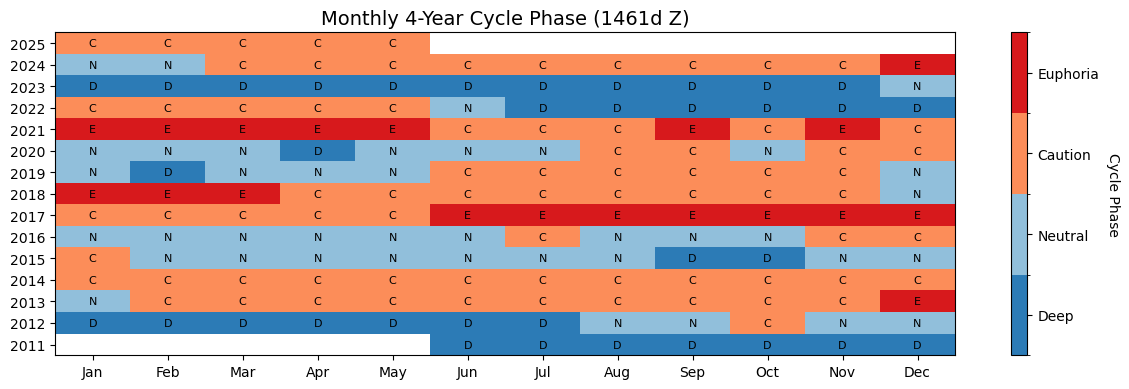

The 1,461-day Z-score was computed on the first trading day of each month and bin it into four phases:  
- **Deep Dip:** Z < 0.7 (blue) - Months align with extended bear markets (2015, 2018–19, 2022). 
- **Neutral:** 0.7 ≤ Z < 1.0 (light-blue)  
- **Caution:** 1.0 ≤ Z < 2.0 (orange)  
- **Euphoria:** Z ≥ 2.0 (red) - Months pinpoint cycle tops (late 2013, late 2017, 2021, late 2024).

- Using the first-of-month Z-score ensures each row is anchored to its own cycle baseline, creating a clean, seasonal map of the four-year halving cycle.

#### 2.1.2 Regime Clustering
K-Means on the five log-price Z-scores (30d, 90d, 180d, 365d, 1 461d) yields four intuitive regimes—Accumulation, Bull, Bear, Transition that consistently map to major market phases:

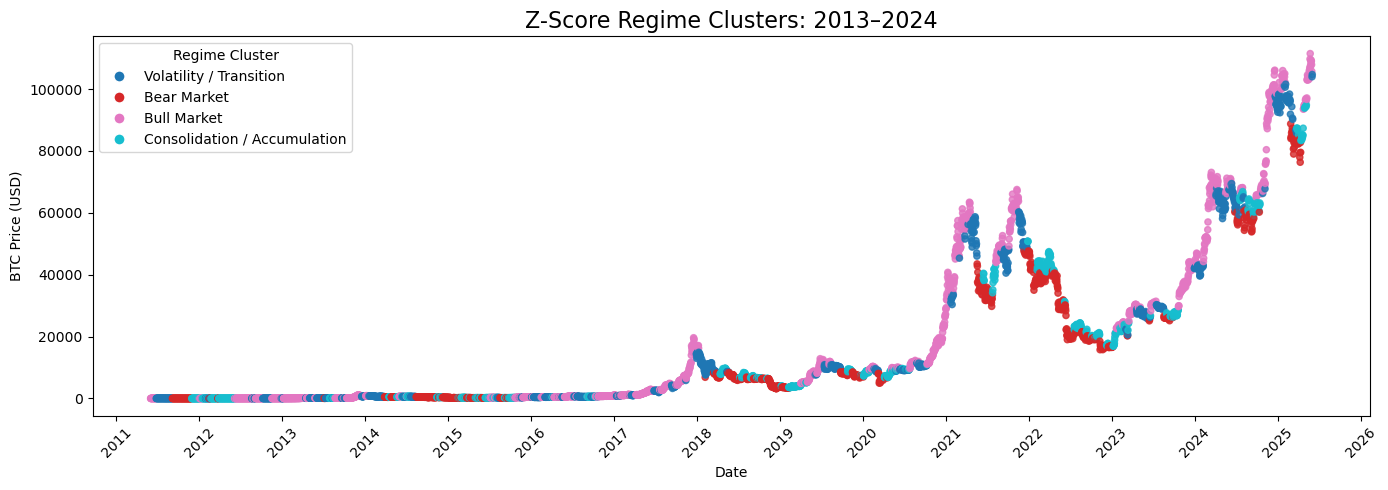

- **Accumulation (teal)** appears at cycle lows, marking disciplined buy zones.  
- **Bull Market (pink)** tracks explosive up-trends.  
- **Bear Market (red)** highlights corrective drawdowns.  
- **Transition (blue)** captures periods of heightened volatility and regime shifts.

**Key insight:** These two visualizations built **only** on log-price Z-scores surface every major market regime and cycle phase with unmatched clarity. No additional on-chain, network or valuation metrics were needed to reveal these robust patterns.  

> **Want to go deeper?**
>
> For a comprehensive deep-dive into the exploratory data analysis, including additional charts and statistical tests that informed our strategy, please see the full EDA notebook.
>
> [**🔗 View Full Exploratory Data Analysis Notebook**](EDA.ipynb)

-------

## 3. Model Development: Crafting a Dynamic DCA Strategy

The journey to building an intelligent investment agent is one of hypothesis, architecture, rigorous testing, and interpretation. Having established the power of log-price Z-scores as the guiding signal, this section details the path taken to build a model that acts on this information, creating a dynamic DCA strategy designed to learn from market history and adapt its behavior.

### 3.1 The Goal: From Signal to Action

Standard Dollar-Cost Averaging (DCA) is a disciplined, passive strategy. The central question of this project is whether an *active* strategy can be built that retains the discipline of DCA but adds a layer of intelligence based on the chosen signal.

The goal is to create a dynamic DCA agent that modulates its daily *buying* allocation based on the five z-score momentum signals, with the objective of accumulating more Bitcoin over a 365-day period than a standard, uniform DCA strategy would for the same total dollar investment. This strategy never sells; it only decides how aggressively to buy.

### 3.2 The Architecture: A Two-Layered Decision System

The model's "brain" is a 23-parameter system structured into two distinct layers, working together to determine the final investment allocation for each day.

* **Layer 1: The Annual Strategist (`α` parameters)**
    At the beginning of each 365-day investment window, this layer assesses the market's macro-condition using the five momentum features established in the EDA. Based on this snapshot, it sets a broad, year-long *game plan*. It does this by creating a baseline investment curve from a mixture of three fundamental profiles:
    1.  **Front-Loaded**: Concentrate capital early in the year.
    2.  **Uniform**: Spread capital perfectly evenly, like a standard DCA.
    3.  **Back-Loaded**: Preserve capital, investing more heavily towards the end of the year.
    The strategist's job is to decide the optimal blend of these three shapes for the year ahead.

* **Layer 2: The Daily Tactician (`β` parameters)**
    With the annual strategy set, this layer makes fine-grained, daily adjustments. For every single day within the year, the tactician looks at the momentum signals and decides whether to *deviate* from the strategist's plan.
    * If it senses a "buy the dip" opportunity (negative z-scores), it will **boost** the day's allocation.
    * If it senses the market is getting over-extended (positive z-scores), it will **reduce** the day's allocation.
    This layer allows the model to be nimble and opportunistic, reacting to daily market volatility without ever exiting its core accumulation posture.

#### 3.2.1 The Allocation Formula

The final daily investment weight is determined by a multi-step process that combines the long-term strategy with daily tactical adjustments.

**Step 1: The Strategic Mixture Weights ($\boldsymbol{\pi}$)**
On the first day of the investment window (Day 1), the strategist layer uses the `α` parameters to calculate a vector of three mixture weights, $\boldsymbol{\pi} = (\pi_{\text{early}}, \pi_{\text{uniform}}, \pi_{\text{late}})$. These weights determine the blend of the three baseline profiles for the year. They are calculated using the softmax function on the initial z-scores ($\mathbf{z}_1$):

$$
\boldsymbol{\pi} = \text{softmax}(\boldsymbol{\alpha} \cdot [1, \mathbf{z}_1]^\top)
$$

**Step 2: The Strategic Timing Curve ($T_d$)**
The mixture weights are then used to create the **strategic timing curve**, $T_d$. This is a baseline allocation shape for each day *d* in the year, formed by a weighted sum of three Beta Probability Density Functions ($f_{\text{Beta}}$):
$$
T_d = \sum_{k=1}^{3} \pi_k \cdot f_{\text{Beta}}(d/365; a_k, b_k)
$$

**Step 3: The Tactical Score and Multiplier ($S_d, f_d$)**
For each day *d*, the tactician layer calculates a score $S_d$ from the daily z-scores ($\mathbf{z}_d$) and then creates an exponential multiplier $f_d$:
$$
S_d = \mathbf{\beta} \cdot \mathbf{z}_d \quad \text{and} \quad f_d = e^{-S_d}
$$
When z-scores are negative (a dip), $S_d$ is negative, making $f_d > 1$ (a boost). When z-scores are positive (a rally), $S_d$ is positive, making $f_d < 1$ (a reduction).

**Step 4: Combination and Sequential Allocation**
The strategic timing curve is multiplied by the daily tactical multipliers to create a final vector of "raw scores" for the entire year:
$$
\text{raw\_score}_d = T_d \times f_d
$$
This vector is then processed by the `allocate_sequential` function, which performs a **sequential, left-to-right drain** to ensure that the final weights ($w_d$) meet the minimum daily investment requirement and that the total budget is fully spent, without ever altering allocations for past days.

### 3.3 The Arena: A Framework for Training and Evaluation

To learn and prove its worth, the model needed a rigorous testing environment.

* **The Gauntlet**: An arena of 4,750 rolling 365-day windows was created. These windows are drawn from a comprehensive backtest period spanning from June 1, 2011, to June 1, 2025. A new year-long trial starts on every single day within this period, forcing the model to prove its effectiveness in every conceivable market condition.

* **The Benchmark**: In each trial, the model faces a clear opponent: the uniform DCA strategy. Success is not measured in raw dollars, but in a percentile score that shows how the model's timing performed relative to the best and worst possible outcomes within that specific year. The model "wins" a window if its percentile score is higher than the uniform DCA's score.

* **The Objective Function**: The model is trained to maximize a blended score that equally weights two goals:
    1.  **Reward-Weighted Percentile (`rw`)**: The average timing percentile score, with more recent windows given slightly more weight.
    2.  **Win Rate (`win`)**: The percentage of the 4,751 windows in which the model beats the uniform DCA benchmark.

### 3.4 The Learning Process: Finding the Optimal Strategy

With the architecture and objective defined, the model began its learning phase.

* **The Optimizer**: **Differential Evolution**, a powerful and robust global optimization algorithm, was employed to search the 23-dimensional parameter space for the combination that would maximize the objective score.

* **Efficient Training**: To make the search computationally feasible, the optimizer was trained on a representative subset of the data: **157 windows** that start on the first of each month. This provided a wide sample of market regimes while dramatically speeding up the learning process.

* **The Ultimate Test: Cross-Validation**: The most critical step was a strict, out-of-sample test. The data was split chronologically:
    * **Training**: The model learned its parameters using only data from *before* January 1, 2021.
    * **Testing**: These learned parameters were then tested on all daily windows *after* January 1, 2021—a future the model had never seen.
    This hold-out test is the gold standard for verifying that a model has learned a genuine, predictive strategy and not just memorized historical noise.

### 3.5 The Verdict: Performance and Results

The model's performance, both in the out-of-sample test and the full backtest, confirmed the validity of the approach.

* **Cross-Validation Results**: On the unseen data from 2021 onward, the model achieved a **100% win rate** against the uniform DCA benchmark across 1,249 windows, with an average reward-weighted percentile of **82.91%**. This stellar performance demonstrated powerful generalization.

* **Full Back-Test Results**: When trained on all monthly windows and evaluated across the entire 14-year backtest, the model achieved a **99.4% win rate** and a reward-weighted percentile of **89.55%**.

The conclusion is clear: the dynamic strategy is not just theoretically sound but empirically dominant, consistently finding a better accumulation path than its static counterpart.

### 3.6 Decoding the Mind: An Analysis of the Learned Parameters

The final `α` and `β` parameters reveal the specific logic the model discovered.

##### **The Strategist's Playbook (`α` coefficients)**

This matrix reveals how the model sets its year-long plan. The key insight is how it chooses between an early, uniform, or late investment schedule.

<div align="center">

| | Intercept | z30 | z90 | z180 | z365 | z1461 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **Early-bias** | +1.351 | +1.073 | -1.226 | +2.514 | +2.995 | -0.408 |
| **Uniform-bias**| -0.108 | -0.681 | +0.347 | -0.680 | -2.997 | -2.999 |
| **Late-bias** | -1.266 | -0.368 | +0.757 | -1.963 | -1.912 | +2.998 |

</div>


* **Default Behavior**: The high positive intercept for Early-bias reveals a learned behavior that accounts for Bitcoin's long-term historical positive drift. In the absence of strong counter-signals, the model defaults to deploying capital early to capitalize on this tendency.
* **Risk Management**: The most powerful signal is the Late-bias row's reaction to the 4-year z-score (`z1461`). If the price is extremely high compared to its long-term cycle average, the model strongly shifts its plan to invest late, patiently preserving capital for a better entry point.

##### **The Tactician's Reflexes (`β` coefficients)**

This vector shows the model's daily, reflexive behavior. The logic is simple and powerful: all learned coefficients are positive.

<div align="center">

| | Coefficient Value |
| :--- | :--- |
| **z30** | +0.570 |
| **z90** | +0.000 |
| **z180** | +0.867 |
| **z365** | +1.255 |
| **z1461** | +5.000 |

</div>

* **The Core Reflex**: Because the coefficients are positive, the daily modulation logic ($e^{-S_d}$) means:
    * When a z-score is negative (a dip), the allocation is **boosted**.
    * When a z-score is positive (a rally), the allocation is **reduced**.
* **Long-Term Memory**: The reaction strength increases with the time horizon, with the 4-year trend (`z1461`) having a coefficient of `+5.0`, an order of magnitude larger than others. This shows the model's most decisive tactical reflex is to increase its buying during dips or ease off during rallies, with a strong focus on the long-term historical cycle.

### 3.7 Strategy Meets Tactics: Alpha and Beta in Action

The true power of the model comes from the interplay between its two minds: the Annual Strategist (`α`) setting the long-term game plan, and the Daily Tactician (`β`) making real-time adjustments. Here is how they collaborate in different market scenarios:

#### Scenario 1: The Raging Bull Market

* **Market Condition:** Prices are consistently making new highs, and momentum is strong across most time frames (mid-to-long-term z-scores are positive).
* **The Strategist (`α`) says:** "The trend is strong. An Early-bias plan is optimal to deploy capital before prices advance further." It establishes a front-loaded baseline investment curve for the year.
* **The Tactician (`β`) says:** "Agreed on the plan, but it is smart to reduce the buy amount on days where price spikes aggressively to avoid paying top-dollar at the peak of the candle."
* **The Combined Outcome:** The model follows a front-loaded accumulation schedule but smooths its entries by automatically paring back buys on the most euphoric days, thus avoiding "FOMO" while still respecting the overall uptrend.

#### Scenario 2: The Deep Bear Market Dip

* **Market Condition:** A sharp correction or prolonged bear market has pushed prices far below their historical averages (most z-scores are strongly negative).
* **The Strategist (`α`) says:** "The market is depressed. This is a generational opportunity. The baseline will be a steady or **Early-bias** accumulation to start capitalizing on these low prices."
* **The Tactician (`β`) says:** "Fear and capitulation are the signals to act decisively. With these deep negative z-scores, a strong multiplier will be applied to aggressively boost the daily buy allocation, far above the baseline."
* **The Combined Outcome:** While the annual plan provides the foundation, the tactician takes over, dramatically accelerating the buying schedule to acquire as much Bitcoin as possible at deeply discounted prices, leaning directly into the market's fear.

#### Scenario 3: The Sideways Chop

* **Market Condition:** The market is directionless. Prices are oscillating in a range, and the z-scores are all hovering close to zero.
* **The Strategist (`α`) says:** "There are no strong macro signals. The default Early-bias plan, driven by the intercept, will be used to proceed with a standard accumulation schedule."
* **The Tactician (`β`) says:** "The signals are also neutral. Only minor adjustments will be made, nudging the allocation slightly up on small dips and slightly down on small rallies, but mostly sticking to the strategist's plan."
* **The Combined Outcome:** The final daily allocation closely tracks the baseline ribbon. The model behaves much like a simple, disciplined DCA investor, patiently accumulating without taking any aggressive tactical stances.

#### Scenario 4: The Overheated Market with a "Buy the Dip" Opportunity

* **Market Condition:** The market is in a mature bull run. Prices are extremely high compared to their 1-year and 4-year averages (`z365` and `z1461` are strongly positive). However, a sharp correction has just occurred, making the 30-day momentum negative (`z30` is negative). This is the classic "buy the dip" dilemma in a potentially toppy market.
* **The Strategist (`α`) says:** "My primary signal is the `+2.998` coefficient on `z1461` in the Late-bias row. The market is cyclically overheated. Despite the short-term dip, the long-term risk is high. Therefore, the dip will be ignored in favor of a back-loaded baseline plan. Capital must be preserved for a much deeper correction."
* **The Tactician (`β`) says:** "Two conflicting signals are present. The negative `z30` suggests a small boost to the buying allocation. However, the extremely positive `z1461` has a `+5.0` coefficient, creating a massive reduction signal. This long-term danger signal completely overwhelms the short-term opportunity. The daily buy allocation will therefore be aggressively reduced, effectively overriding the 'buy the dip' impulse."
* **The Combined Outcome:** Both the strategist and the tactician agree to be defensive, for different but complementary reasons. The model does not buy the dip. Instead, it significantly reduces its accumulation, waiting for the long-term valuation metrics to cool down. This demonstrates a sophisticated, built-in risk-management behavior, prioritizing long-term cycle awareness over short-term tactical opportunities when the market is perceived as being in a high-risk, euphoric phase.

This two-layer system ensures the model is never flying blind. It is always guided by a long-term strategy while remaining nimble enough to exploit or protect itself from short-term volatility.

### 3.8 Visualizing the Strategy in Action

To make the model's behavior intuitive, a diagnostic plot is produced for each 3 months-spaced 365-day window.

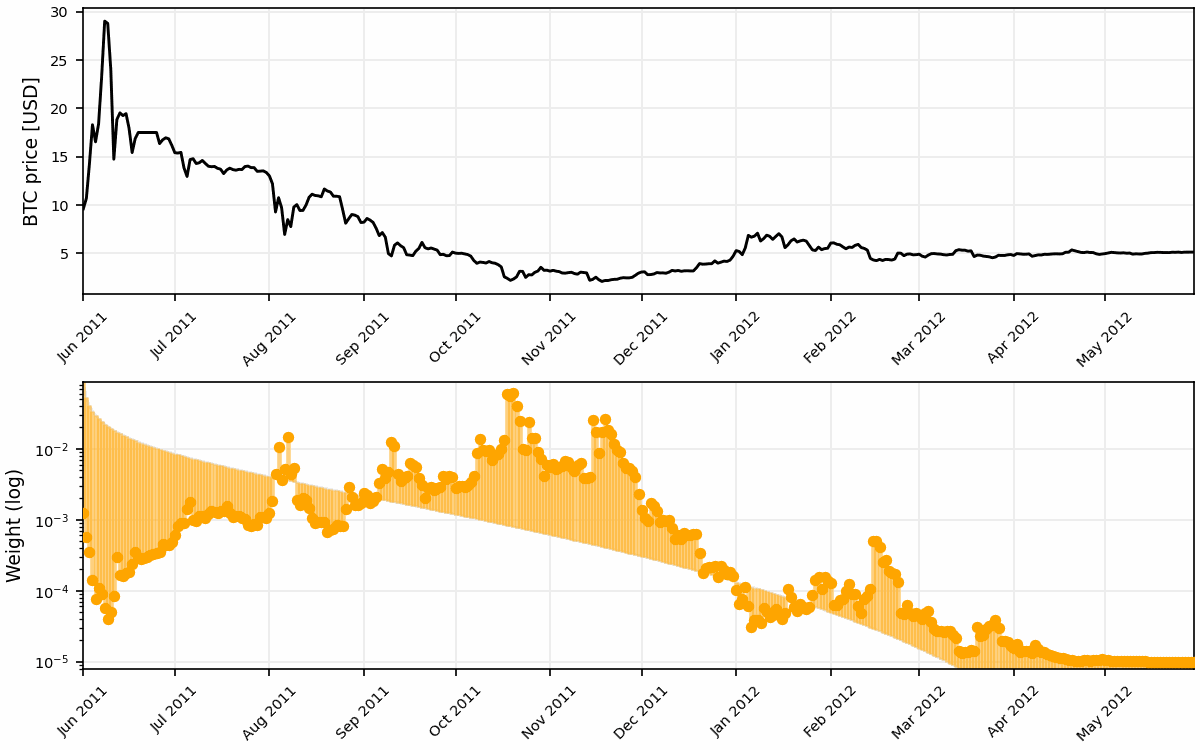

This visualization contains two key elements on a single chart:

* **Top Panel: BTC Price**: A simple chart of the USD price provides the essential context for the model's actions.
* **Bottom Panel: Allocation Lollipop Chart on a log scale**:
    * A **gray ribbon** shows the baseline investment schedule determined by the Annual Strategist (`α` layer).
    * **Orange "lollipops"** show the final daily allocation after the Daily Tactician (`β` layer) has made its adjustments.
        * A stem **above the ribbon** indicates the model is over-weighting that day—aggressively buying a dip.
        * A stem **below the ribbon** indicates an under-weighting—easing off during a price spike.

Observing these two panels together reveals why the model makes its decisions. Clusters of tall orange lollipops will invariably appear during sharp price drawdowns, while shorter lollipops (below the gray ribbon) will appear during price rallies. This visually confirms the model's core learned behavior: it systematically increases its buying into fear and reduces it into greed.


> **Explore the Code Behind the Model**
>
> To review the underlying Python code, the implementation of the optimization process, and the complete technical details of the model's architecture, please refer to the detailed development notebook.
>
> [**🔗 View Detailed Model Development with Code**](Model_Code.ipynb)

> **Project Collaboration and Validation**
>
> This project was developed in collaboration with **Georgia Tech Intitute of Technology** and **Trilemma Foundation**. As a requirement of this partnership, the model was rigorously validated against a standardized boilerplate to ensure its robustness and adherence to specific performance benchmarks. The implementation and results of this test can be found in the notebook below.
>
> [**🔗 View Boilerplate Test Notebook**](Model_Development_Template.ipynb)